# Largest Prime Factor
The prime factors of 13195 are 5, 7, 13, and 29.
What is the larges prime factor of the number 600851475143

## Solution One - Brute Force
One possible solution to the problem would be just to test all numbers less then the squaroot of $n$ and then test if they are prime.

In [1]:
from math import sqrt, ceil

from utils.timing import timed

@timed(10)
def solution_one(number: int) -> int:
    """
    finds the largest primed factor of a number
    
    :param number: number
    """
    largest: int = 0
    
    for i in range(2, ceil(sqrt(number) + 1)):
        
        if not number % i:
            prime: bool = True
                
            for j in range (2, ceil(sqrt(i) + 1)):
                
                if not i % j:
                    prime = False
                    break
                    
            if prime:
                largest = i
                
    return largest if largest else number

answer, time = solution_one(600851475143)
print(f'The answer is: {answer}\nThat took: {time}')

The answer is: 6857
That took: 0.05767917619959917


### Problems with solution one
Solution one slowest parts are testing all numbers under $n$ to see if they divide %n% evenly and then checking if they are prime.

## Solution Two - Using the fundamental Theorem of Arithmetic
We can avoid testing each of $n$'s divisors for primality by using the Fundamental Theorem of Arithmetic which states:

> "Any integer greater than 1 is either a prime number, or can be written as a unique product of prime numbers."

Therefore, instead of testing all the divisors of $n$ for primality, we, going from 2 to $\sqrt{n} + 1$ we assume that number $k$ is prime and keep dividing $n$ by $k$ as long as possible. This way the next divisor we get is also prime.

In [2]:
from math import sqrt, ceil

from utils.timing import timed

@timed(10)
def solution_two(number: int) -> int:
    """
    finds the largest primed factor of a number
    
    :param number: number
    """
    largest: int = 0
    
    for i in range(2, ceil(sqrt(number) + 1)):
        
        if not number % i:
            largest = i
            
            while not number % i:
                number //= i
                    
    return largest if largest else number

answer, time = solution_two(600851475143)
print(f'The answer is: {answer}\nThat took: {time}')

The answer is: 6857
That took: 0.027133922400389567


### Problem with solution two
While we eliminated the loops necessary to check for primality of $n$'s divisors, we still have to iterate through every number from 2 to $\sqrt{n} + 1$

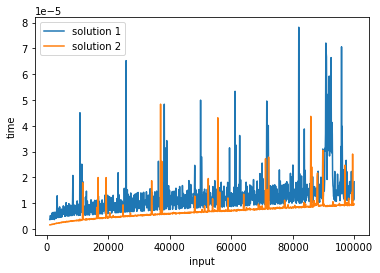

In [3]:
from utils.plotting import plot_range

params = tuple((i,) for i in range(1000, 100000, 100))
plot_range(params, (solution_one, solution_two))